In [57]:
!pip install sklearn

!pip install folium

!pip install pandas


Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0.post4.tar.gz (3.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [8 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\TUTUser\AppData\Local\Temp\pip-install-ojx3ekyy\sklearn_8ff524de0acb43f5885163a34535000b\setup.py", line 10, in <module>
      LONG_DESCRIPTION = f.read()
    File "C:\ProgramData\anaconda3\lib\encodings\cp1252.py", line 23, in decode
      return codecs.charmap_decode(input,self.errors,decoding_table)[0]
  UnicodeDecodeError: 'charmap' codec can't decode byte 0x8f in position 7: character maps to <undefined>
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See abo

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [74]:
data = pd.read_csv("nyc_taxi_trip_duration.csv")
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [75]:
data.tail()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


In [76]:
data.shape

(729322, 11)

In [77]:
data.size

8022542

In [78]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [79]:
data.info

<bound method DataFrame.info of                id  vendor_id      pickup_datetime     dropoff_datetime  \
0       id1080784          2  2016-02-29 16:40:21  2016-02-29 16:47:01   
1       id0889885          1  2016-03-11 23:35:37  2016-03-11 23:53:57   
2       id0857912          2  2016-02-21 17:59:33  2016-02-21 18:26:48   
3       id3744273          2  2016-01-05 09:44:31  2016-01-05 10:03:32   
4       id0232939          1  2016-02-17 06:42:23  2016-02-17 06:56:31   
...           ...        ...                  ...                  ...   
729317  id3905982          2  2016-05-21 13:29:38  2016-05-21 13:34:34   
729318  id0102861          1  2016-02-22 00:43:11  2016-02-22 00:48:26   
729319  id0439699          1  2016-04-15 18:56:48  2016-04-15 19:08:01   
729320  id2078912          1  2016-06-19 09:50:47  2016-06-19 09:58:14   
729321  id1053441          2  2016-01-01 17:24:16  2016-01-01 17:44:40   

        passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  

In [80]:
#========check missing values=========
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [81]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [82]:

data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime']).astype('int64') // 10**9
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime']).astype('int64') // 10**9

In [83]:
#drop id column

data = data.drop("id", axis=1)

In [84]:
# categorical data
data["store_and_fwd_flag"] = data["store_and_fwd_flag"].apply(lambda x: 1 if x == "Y" else 0)
data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,1456764021,1456764421,1,-73.953918,40.778873,-73.963875,40.771164,0,400
1,1,1457739337,1457740437,2,-73.988312,40.731743,-73.994751,40.694931,0,1100
2,2,1456077573,1456079208,2,-73.997314,40.721458,-73.948029,40.774918,0,1635
3,2,1451987071,1451988212,6,-73.961670,40.759720,-73.956779,40.780628,0,1141
4,1,1455691343,1455692191,1,-74.017120,40.708469,-73.988182,40.740631,0,848


In [85]:
data["longitude_distance"] = abs(data["pickup_longitude"] - data["dropoff_longitude"])
data["latitude_distance"] = abs(data["pickup_latitude"] - data["dropoff_latitude"])




data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,longitude_distance,latitude_distance
0,2,1456764021,1456764421,1,-73.953918,40.778873,-73.963875,40.771164,0,400,0.009956,0.007710
1,1,1457739337,1457740437,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,0.006439,0.036812
2,2,1456077573,1456079208,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,0.049286,0.053459
3,2,1451987071,1451988212,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,0.004890,0.020908
4,1,1455691343,1455692191,1,-74.017120,40.708469,-73.988182,40.740631,0,848,0.028938,0.032162


<Axes: >

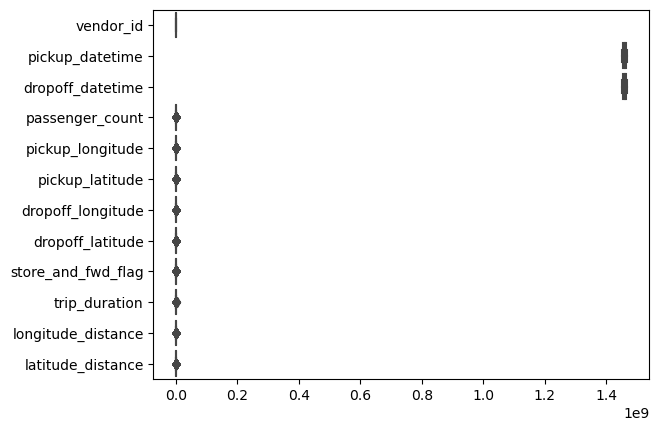

In [86]:
# check for outliers

# Check for outliers
sns.boxplot(data=data, orient="h")

# dealing with outliers!

In [87]:
data["trip_duration"].quantile(0.25) , data["trip_duration"].quantile(0.75)

(397.0, 1075.0)

In [88]:
IQR = data["trip_duration"].quantile(0.75) -data["trip_duration"].quantile(0.25) 
IQR

678.0

In [89]:
q1 = data["trip_duration"].quantile(0.25)
q3 = data["trip_duration"].quantile(0.75)

lower_wh1 = q1 - (1.5*IQR)
upper_wh2 = q3 + (1.5*IQR)

lower_wh1, upper_wh2
#outliers = data[(data['trip_duration'] < lower_wh1) | (data['trip_duration'] > upper_wh2)]
#outliers                               
                                    

(-620.0, 2092.0)

In [90]:
data.loc[data['trip_duration']>2092]

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,longitude_distance,latitude_distance
15,2,1456019774,1456105938,1,-74.002876,40.734131,-73.955399,40.767502,0,86164,0.047478,0.033371
26,1,1466952605,1466954955,2,-74.000168,40.758141,-73.947266,40.764793,0,2350,0.052902,0.006653
42,1,1456936180,1456938369,1,-73.997459,40.724735,-73.954414,40.669811,0,2189,0.043045,0.054924
55,1,1464649440,1464651720,1,-73.984367,40.760208,-73.913246,40.686783,0,2280,0.071121,0.073425
74,2,1464974989,1464977140,1,-74.006973,40.675991,-73.949379,40.717659,0,2151,0.057594,0.041668
...,...,...,...,...,...,...,...,...,...,...,...,...
729221,2,1454022877,1454025544,1,-73.979088,40.755871,-73.949471,40.594769,0,2667,0.029617,0.161102
729232,2,1466210601,1466213883,1,-73.999741,40.728352,-73.964348,40.760529,0,3282,0.035393,0.032177
729273,2,1460371079,1460374305,2,-73.782272,40.644493,-74.009514,40.713406,0,3226,0.227242,0.068913
729276,1,1465499554,1465502039,1,-73.964828,40.757729,-73.790283,40.643536,0,2485,0.174545,0.114193


In [91]:
# deleting outliers
data = data.drop(data[data['trip_duration']>2092].index)



In [92]:
data.loc[data['trip_duration']>2092]

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,longitude_distance,latitude_distance


In [93]:
data.dtypes

vendor_id               int64
pickup_datetime         int64
dropoff_datetime        int64
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag      int64
trip_duration           int64
longitude_distance    float64
latitude_distance     float64
dtype: object

#  3. What is the target variable that you will be predicting in this dataset?

- The target variable in this dataset is "trip_duration", which represents the time in seconds between the pickup and dropoff of a taxi trip.






# 4. What are the independent variables that may influence the target variable?


The independent variables that may influence the target variable are:

- vendor_id: an identifier for the taxi company that provided the trip.

- pickup_datetime: the date and time when the passenger(s) were picked up.

- dropoff_datetime: the date and time when the passenger(s) were dropped off.

- passenger_count: the number of passengers in the vehicle.

- pickup_longitude: the longitude of the pickup location.

- pickup_latitude: the latitude of the pickup location.

- dropoff_longitude: the longitude of the dropoff location.

- dropoff_latitude: the latitude of the dropoff location.


# 5.  What machine learning algorithm(s) would be appropriate for this prediction task?


- Linear Regression :the target variable is a continuous variable (trip duration)

# Perform predictive modeling
- Segregating variables: Independent and Dependent Variables
- Splitting the data into train set and the test set
- Implementing your model
- Evaluate and interpret your model using different evaluation metrics


### Segregating variables: Independent and Dependent Variables

In [106]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

data = shuffle(data , random_state = 42)

x = data.drop('trip_duration', axis=1)
y = data["trip_duration"] 

x.shape, y.shape


((692359, 11), (692359,))

In [110]:
x

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,longitude_distance,latitude_distance
544730,2,1463350522,1463350914,1,-73.988625,40.764015,-73.986450,40.746506,0,0.002174,0.017509
604947,2,1461324125,1461325358,1,-73.995277,40.739899,-73.983322,40.751385,0,0.011955,0.011486
670689,1,1461833288,1461833648,1,-73.993385,40.758846,-73.988625,40.769444,0,0.004761,0.010597
371308,1,1458544091,1458544929,1,-73.991127,40.749622,-73.976707,40.751545,0,0.014420,0.001923
545186,2,1466857632,1466857789,1,-73.955681,40.779781,-73.959183,40.771542,0,0.003502,0.008240
...,...,...,...,...,...,...,...,...,...,...,...
222695,2,1461696758,1461697942,2,-73.991501,40.750000,-73.970177,40.799519,0,0.021324,0.049519
327636,1,1456766907,1456767279,1,-74.015297,40.713932,-74.004524,40.725590,0,0.010773,0.011658
115143,1,1451764879,1451765101,2,-73.999947,40.721935,-74.010307,40.709202,0,0.010361,0.012733
502098,2,1452869693,1452871191,6,-73.870651,40.773621,-73.961060,40.775082,0,0.090408,0.001461


# Splitting the data into train set and the test set

In [139]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.25, random_state = 56)

#  Implementing model: linear regression

In [140]:
from sklearn.linear_model import LinearRegression as linear
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score



lr = linear()
lr.fit(train_x, train_y)




LinearRegression()

In [141]:
prediction = lr.predict(train_x)
m_a_e = mae(prediction ,train_y)
m_a_e




1.6511876352209168e-07

In [142]:
prediction = lr.predict(test_x)
m_a_e = mae(prediction ,test_y)
m_a_e


1.6509168326052552e-07

#  Evaluate and interpret your model using different evaluation metrics

In [143]:
#Evaluating the model using Mean Squared Error

mean_sq_error = mse(test_y , prediction)
mean_sq_error




2.8981875312951405e-14

In [144]:
#Evaluating the model using Mean Absolute Error
prediction = lr.predict(test_x)
mean_abs_err = mae(prediction ,test_y)
mean_abs_err


1.6509168326052552e-07

In [145]:
#Evaluating the model using Root Mean Squared Error

r_mean_sq_err = np.sqrt(mean_sq_error)
r_mean_sq_err


1.7024063942828517e-07

In [133]:
#Evaluating the model using R-squared
r_squared = r2_score(test_y,prediction)
r_squared

1.0